In [1]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras.datasets import fashion_mnist
import numpy as np
import pandas as pd

* Попробуйте улучшить работу нейронной сети (разобранную на уроке), обучавшейся на датасет Fashion-MNIST. Напишите в комментариях к уроку, какого результата вы добились от нейросети и что помогло улучшить её точность
* Поработайте с документацией TensorFlow 2. Попробуйте найти полезные команды TensorFlow, неразобранные на уроке
* Попробуйте обучить нейронную сеть на TensorFlow 2 на датасете imdb_reviews.
* Напишите в комментариях к уроку, какого результата вы добились от нейросети и что
помогло улучшить её точность

 ### Импортируем данные

In [2]:
(X_train, y_train_labels), (X_test, y_test_labels) = fashion_mnist.load_data()
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
# Стандартизация
X_train = X_train / 255.0
train_images = train_images/255
X_test = X_test / 255.0
test_images = test_images/255
X_train.min(), X_train.max()

(0.0, 1.0)

In [4]:
#векторизация
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

In [5]:
# изменение формата метки класса
y_train = to_categorical(y_train_labels)
y_test = to_categorical(y_test_labels)

y_train[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

* Для начала используем получившуюся модель с предыдущего ДЗ
* Для векторизации данных на вход используем метод Flatten()
* Модель представляет собой полносвязную многослойную сеть с тремя скрытыми слоями и количеством нейронов в слоях 220, 165, 165 соответственно. Функция активации в скрытых слоях - Relu, на выходном слое - Sigmoid

In [6]:
model = tf.keras.models.Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(220, activation='relu'),
    Dense(165, activation='relu'),
    Dense(165, activation='relu'),
    Dense(10, activation='sigmoid')
])

model.summary()

# Компиляция модели
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 220)               172700    
                                                                 
 dense_1 (Dense)             (None, 165)               36465     
                                                                 
 dense_2 (Dense)             (None, 165)               27390     
                                                                 
 dense_3 (Dense)             (None, 10)                1660      
                                                                 
Total params: 238,215
Trainable params: 238,215
Non-trainable params: 0
_________________________________________________________________


* Все последующие вычисления для сетей будем проводить на графическом процессоре

In [7]:
with tf.device('GPU:0'):
    history = model.fit(X_train, y_train,
        epochs=15,
        batch_size=64,
        verbose=1,
        validation_data=(X_test, y_test)
    )

Epoch 1/15
938/938 [==============================] - 13s 13ms/step - loss: 0.4927 - accuracy: 0.8234 - val_loss: 0.4084 - val_accuracy: 0.8451
Epoch 2/15
938/938 [==============================] - 13s 14ms/step - loss: 0.3605 - accuracy: 0.8674 - val_loss: 0.3792 - val_accuracy: 0.8595
Epoch 3/15
938/938 [==============================] - 11s 12ms/step - loss: 0.3241 - accuracy: 0.8790 - val_loss: 0.3504 - val_accuracy: 0.8725
Epoch 4/15
938/938 [==============================] - 13s 14ms/step - loss: 0.3045 - accuracy: 0.8866 - val_loss: 0.3491 - val_accuracy: 0.8736
Epoch 5/15
938/938 [==============================] - 13s 14ms/step - loss: 0.2820 - accuracy: 0.8939 - val_loss: 0.3481 - val_accuracy: 0.8760
Epoch 6/15
938/938 [==============================] - 13s 14ms/step - loss: 0.2695 - accuracy: 0.8981 - val_loss: 0.3261 - val_accuracy: 0.8796
Epoch 7/15
938/938 [==============================] - 13s 14ms/step - loss: 0.2574 - accuracy: 0.9030 - val_loss: 0.3208 - val_accuracy:

In [8]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy'] 

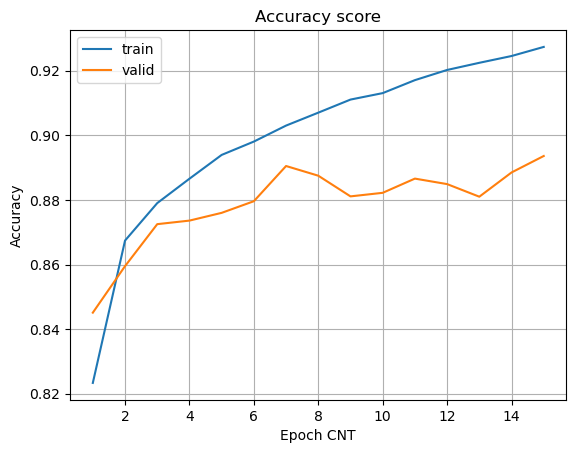

In [9]:
plt.plot(np.arange(1, len(history.history['accuracy'])+1, 1), train_acc, label = 'train')
plt.plot(np.arange(1, len(history.history['accuracy'])+1, 1), val_acc, label = 'valid')
plt.legend()
plt.xlabel('Epoch CNT')
plt.ylabel('Accuracy')
plt.title('Accuracy score')
plt.grid()
plt.show()

In [10]:
f"Наилучшее значение Accuracy на трейне {round(history.history['accuracy'][14], 4)}, на тесте {round(history.history['val_accuracy'][14], 4)}, при количестве эпох - 15"

'Наилучшее значение Accuracy на трейне 0.9274, на тесте 0.8936, при количестве эпох - 15'

In [28]:
# Метки классов для построения матрицы корреляции
class_names = ['Футболки',
               'Брюки',
               'Пуловеры',
               'Платья',
               'Пальто',
               'Сандали',
               'Рубашки',
               'Кроссовки',
               'Сумки',
               'Ботинки']

In [12]:
y_pred = np.argmax(model.predict(X_test), axis=1)
y_pred[:10]

313/313 [==============================] - 2s 4ms/step


array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=int64)

In [13]:
CM = confusion_matrix(y_test_labels, y_pred)

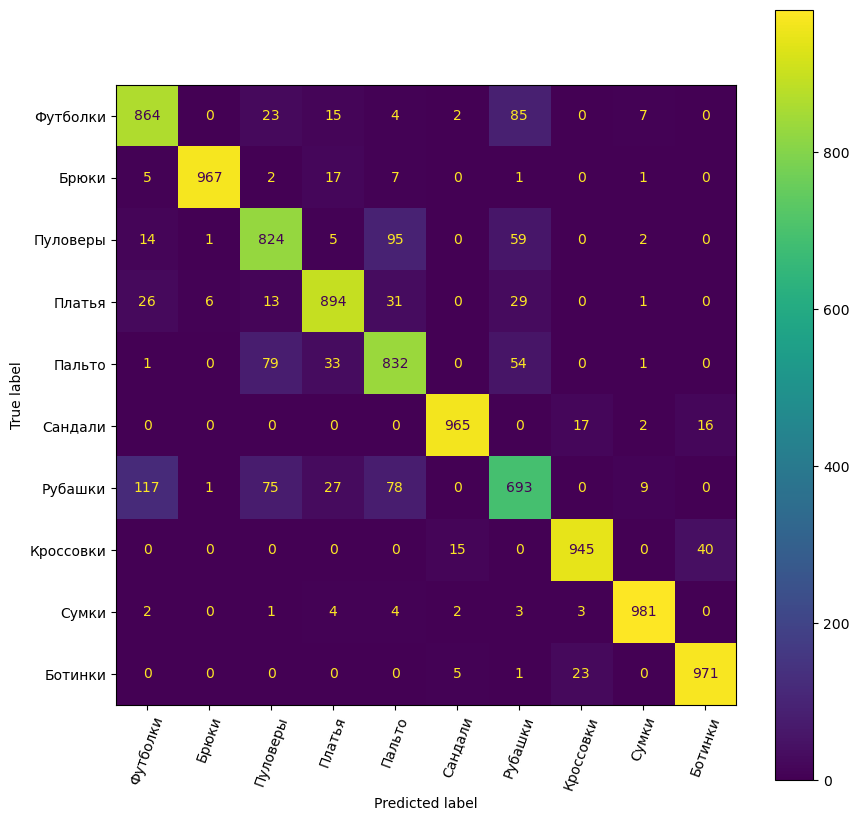

In [14]:
disp = ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=class_names)

fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(values_format='.3g', ax=ax)
plt.xticks(rotation=70)
plt.show();

* Модель сильно путает рубашки с футболками пуловерами плятьсями и пальто
* Лучше всего различает сумки
* Попробуем улучшить модель собрав ансамбль сетей

### Ансамбль сетей

Реализуем одинаковые сети в разном стиле:
- model1 - линейная модель через список. Оптимизатор sgd
- model2 - линейная модель через добавление слоев по очереди. Оптимизатор rmsprop
- model3 - модель через функциональное описание. Оптимизатор adam

In [16]:
# заполняем модель списком
model1 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(220, activation='relu'),
    Dense(165, activation='relu'),
    Dense(165, activation='relu'),
    Dense(10, activation='sigmoid')
])

# заполняем модель, добавляя слои последовательно 
model2 = Sequential()
model2.add(Flatten(input_shape=(28, 28)))
model2.add(Dense(220, activation='relu'))
model2.add(Dense(165, activation='relu'))
model2.add(Dense(165, activation='relu'))
model2.add(Dense(10, activation='sigmoid'))

# Заполняем модель, формируя граф передачи тензоров
input = Input(shape=(28, 28))
x = Flatten()(input)
x = Dense(220, activation='relu')(x)
x = Dense(165, activation='relu')(x)
x = Dense(165, activation='relu')(x)
output = Dense(10, activation='sigmoid')(x)
model3 = Model(input, output)



model1.compile(optimizer='sgd',
               loss='categorical_crossentropy',
               metrics=['accuracy'])
model2.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])
model3.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

with tf.device('GPU:0'):
    hist1 = model1.fit(X_train, y_train,
                       epochs=15,
                       batch_size=64,
                       validation_data=(X_test, y_test))
    print()
    hist2 = model2.fit(X_train, y_train,
                       epochs=15,
                       batch_size=64,
                       validation_data=(X_test, y_test))
    print()
    hist3 = model3.fit(X_train, y_train,
                       epochs=15,
                       batch_size=64,
                       validation_data=(X_test, y_test))

Epoch 1/15
938/938 [==============================] - 14s 14ms/step - loss: 0.8958 - accuracy: 0.7125 - val_loss: 0.6464 - val_accuracy: 0.7735
Epoch 2/15
938/938 [==============================] - 12s 12ms/step - loss: 0.5356 - accuracy: 0.8151 - val_loss: 0.5380 - val_accuracy: 0.8074
Epoch 3/15
938/938 [==============================] - 10s 11ms/step - loss: 0.4798 - accuracy: 0.8323 - val_loss: 0.4867 - val_accuracy: 0.8301
Epoch 4/15
938/938 [==============================] - 12s 13ms/step - loss: 0.4465 - accuracy: 0.8435 - val_loss: 0.5230 - val_accuracy: 0.8050
Epoch 5/15
938/938 [==============================] - 13s 14ms/step - loss: 0.4248 - accuracy: 0.8503 - val_loss: 0.4624 - val_accuracy: 0.8397
Epoch 6/15
938/938 [==============================] - 10s 11ms/step - loss: 0.4078 - accuracy: 0.8569 - val_loss: 0.4409 - val_accuracy: 0.8475
Epoch 7/15
938/938 [==============================] - 12s 13ms/step - loss: 0.3932 - accuracy: 0.8614 - val_loss: 0.4332 - val_accuracy:

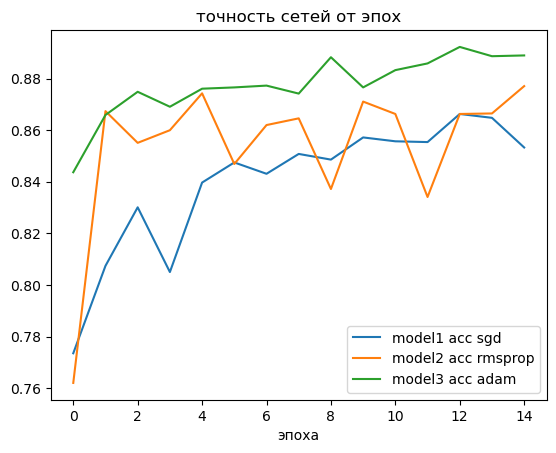

In [17]:
plt.plot(hist1.history['val_accuracy'], label='model1 acc sgd')
plt.plot(hist2.history['val_accuracy'], label='model2 acc rmsprop')
plt.plot(hist3.history['val_accuracy'], label='model3 acc adam')
plt.title('точность сетей от эпох')
plt.xlabel('эпоха')
plt.legend()
plt.show()

* Все три модели обучились с разной степенью точности

In [18]:
y_pred1 = np.argmax(model1.predict(X_test), axis=1)
y_pred2 = np.argmax(model2.predict(X_test), axis=1)
y_pred3 = np.argmax(model3.predict(X_test), axis=1)

CM1 = confusion_matrix(y_test_labels, y_pred1)
CM2 = confusion_matrix(y_test_labels, y_pred2)
CM3 = confusion_matrix(y_test_labels, y_pred3)

313/313 [==============================] - 1s 4ms/step


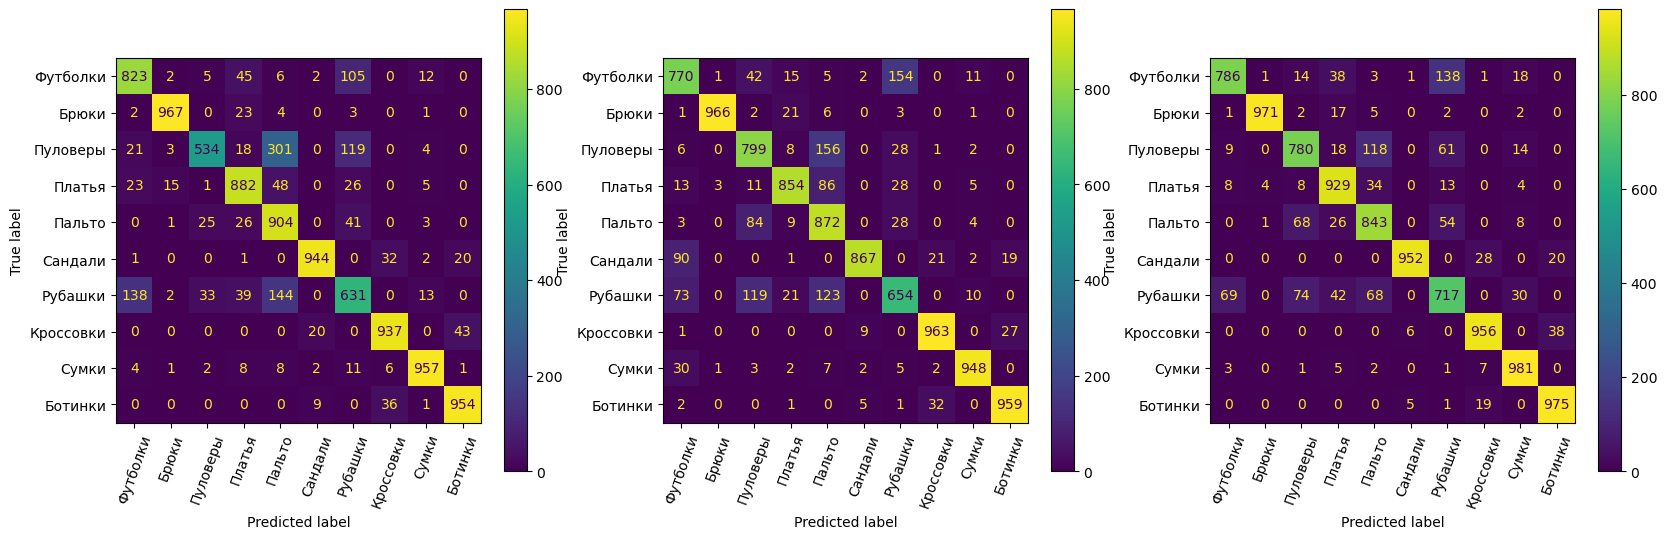

In [19]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

disp1 = ConfusionMatrixDisplay(confusion_matrix=CM1, display_labels=class_names)
disp1.plot(ax=ax1, values_format='.3g')
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=70)

disp2 = ConfusionMatrixDisplay(confusion_matrix=CM2, display_labels=class_names)
disp2.plot(ax=ax2, values_format='.3g')
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=70)

disp3 = ConfusionMatrixDisplay(confusion_matrix=CM3, display_labels=class_names)
disp3.plot(ax=ax3, values_format='.3g')
plt.xticks(rotation=70)

plt.show()

In [20]:
#save
model1.save('model1.h5')
model2.save('model2.h5')
model3.save('model3.h5')

In [21]:
input = Input(shape=(28, 28))
flat = Flatten()(input)

x1 = Dense(220, activation='relu')(flat)
x1 = Dense(165, activation='relu')(x1)
x1 = Dense(165, activation='relu')(x1)
x1 = Dense(10, activation='softmax')(x1)
model1 = Model(inputs=input, outputs=x1)

x2 = Dense(220, activation='relu')(flat)
x2 = Dense(165, activation='relu')(x2)
x2 = Dense(165, activation='relu')(x2)
x2 = Dense(10, activation='softmax')(x2)
model2 = Model(inputs=input, outputs=x2)

x3 = Dense(220, activation='relu')(flat)
x3 = Dense(165, activation='relu')(x3)
x3 = Dense(165, activation='relu')(x3)
x3 = Dense(10, activation='softmax')(x3)
model3 = Model(inputs=input, outputs=x3)

# усредняем выходы сетей - max
out_all = tf.keras.layers.Average()([model1.output, model2.output, model3.output])
out_all = tf.keras.layers.Softmax()(out_all)

model_all = Model(inputs=[input], outputs=out_all)
model_all.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

model1.load_weights('model1.h5')
model2.load_weights('model2.h5')
model3.load_weights('model3.h5')

In [22]:
model_all.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 28, 28)]     0           []                               
                                                                                                  
 flatten_7 (Flatten)            (None, 784)          0           ['input_3[0][0]']                
                                                                                                  
 dense_28 (Dense)               (None, 220)          172700      ['flatten_7[0][0]']              
                                                                                                  
 dense_32 (Dense)               (None, 220)          172700      ['flatten_7[0][0]']              
                                                                                            

In [23]:
with tf.device('GPU:0'):
    history1 = model_all.fit(X_train, y_train,
        epochs=15,
        batch_size=64,
        verbose=1,
        validation_data=(X_test, y_test))

Epoch 1/15
938/938 [==============================] - 26s 25ms/step - loss: 1.5921 - accuracy: 0.8918 - val_loss: 1.5963 - val_accuracy: 0.8751
Epoch 2/15
938/938 [==============================] - 24s 26ms/step - loss: 1.5895 - accuracy: 0.8888 - val_loss: 1.6056 - val_accuracy: 0.8718
Epoch 3/15
938/938 [==============================] - 24s 25ms/step - loss: 1.5896 - accuracy: 0.8884 - val_loss: 1.6064 - val_accuracy: 0.8734
Epoch 4/15
938/938 [==============================] - 21s 23ms/step - loss: 1.5886 - accuracy: 0.8886 - val_loss: 1.6039 - val_accuracy: 0.8739
Epoch 5/15
938/938 [==============================] - 22s 23ms/step - loss: 1.5863 - accuracy: 0.8883 - val_loss: 1.6058 - val_accuracy: 0.8719
Epoch 6/15
938/938 [==============================] - 24s 26ms/step - loss: 1.5938 - accuracy: 0.8878 - val_loss: 1.6144 - val_accuracy: 0.8565
Epoch 7/15
938/938 [==============================] - 22s 23ms/step - loss: 1.5932 - accuracy: 0.8853 - val_loss: 1.6082 - val_accuracy:

313/313 [==============================] - 2s 6ms/step


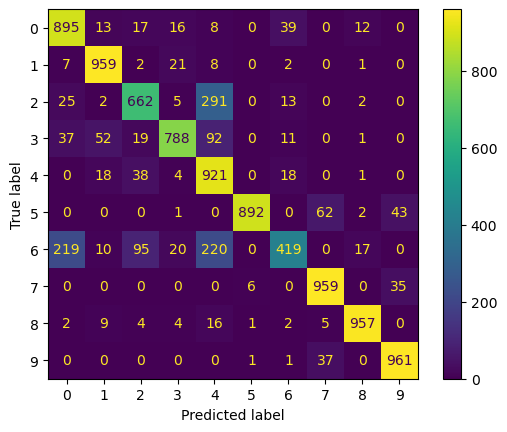

In [24]:
y_pred_all = np.argmax(model_all.predict(X_test), axis=1)

CM_all = confusion_matrix(y_test_labels, y_pred_all)
disp_all = ConfusionMatrixDisplay(confusion_matrix=CM_all, display_labels=np.arange(10))
disp_all.plot(values_format ='.3g')
plt.show()

In [25]:
f"Наилучшее значение Accuracy на трейне {round(history.history['accuracy'][14], 4)}, на тесте {round(history.history['val_accuracy'][14], 4)}, при количестве эпох - 15"


'Наилучшее значение Accuracy на трейне 0.9274, на тесте 0.8936, при количестве эпох - 15'

In [26]:
f"Наилучшее значение Accuracy на трейне {round(history1.history['accuracy'][14], 4)}, на тесте {round(history1.history['val_accuracy'][14], 4)}, при количестве эпох - 15"

'Наилучшее значение Accuracy на трейне 0.8809, на тесте 0.8413, при количестве эпох - 15'

* Оценивая полученные результаты видно, что ансамбль сетей справился с поставленной задачей хуже первоначальной модели
* Это говорит о том что изначально модель была собрана с более оптимальными значениями гиперпараметров

* Можно попробовать обучить отдельную модель хорошо распозновать наиболее слабо предстказываемый класс и впоследствии путём стэкинга соединить её с первоначальной моделью

In [27]:
input6 = Input(shape=(28, 28))
x6 = Flatten()(input6)
x6 = Dense(220, activation='relu')(x6)
x6 = Dense(165, activation='relu')(x6)
x6 = Dense(165, activation='relu')(x6)
x6 = Dense(1, activation='sigmoid')(x6)

model6 = Model(inputs=input6, outputs=x6)
model6.compile(optimizer='adam',
                  loss=tf.keras.losses.BinaryCrossentropy(),
                  metrics=[tf.metrics.Recall(), tf.metrics.Precision()])

with tf.device('GPU:0'):
    model6.fit(X_train, y_train[:,6], batch_size=64, epochs=15, validation_split=0.2)

Epoch 1/15
750/750 [==============================] - 12s 14ms/step - loss: 0.1898 - recall: 0.3546 - precision: 0.7304 - val_loss: 0.1565 - val_recall: 0.5457 - val_precision: 0.7109
Epoch 2/15
750/750 [==============================] - 9s 12ms/step - loss: 0.1549 - recall: 0.5119 - precision: 0.7649 - val_loss: 0.1505 - val_recall: 0.5144 - val_precision: 0.7859
Epoch 3/15
750/750 [==============================] - 10s 13ms/step - loss: 0.1436 - recall: 0.5405 - precision: 0.7910 - val_loss: 0.1349 - val_recall: 0.4900 - val_precision: 0.8556
Epoch 4/15
750/750 [==============================] - 9s 12ms/step - loss: 0.1355 - recall: 0.5834 - precision: 0.7916 - val_loss: 0.1421 - val_recall: 0.7058 - val_precision: 0.6792
Epoch 5/15
750/750 [==============================] - 10s 13ms/step - loss: 0.1324 - recall: 0.5974 - precision: 0.7940 - val_loss: 0.1387 - val_recall: 0.6762 - val_precision: 0.7070
Epoch 6/15
750/750 [==============================] - 10s 13ms/step - loss: 0.1248